#Machine Learning Course Assignment#

*Prof: Ladle Patel*

*Student: Pietro Barizza*

*Case study 1: Rossmann Store Sales*

*Objective*

You are provided with historical sales data of 1,115 Rossmann stores. Your task is to build predictive models to forecast sales based on a few relevant features using:
* Linear Regression
* Decision Tree Regressor


In [109]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Load the train.csv dataset and display the first 5 rows.

In [110]:
# load dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/assignment/RossmannSalesData.csv')

In [111]:
# explore the dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


Q2. What is the shape of the dataset?

In [112]:
df.shape

(1149, 9)

In [113]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [114]:
df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,int64
SchoolHoliday,int64


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          1149 non-null   int64 
 1   DayOfWeek      1149 non-null   int64 
 2   Date           1149 non-null   object
 3   Sales          1149 non-null   int64 
 4   Customers      1149 non-null   int64 
 5   Open           1149 non-null   int64 
 6   Promo          1149 non-null   int64 
 7   StateHoliday   1149 non-null   int64 
 8   SchoolHoliday  1149 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 80.9+ KB


In [140]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.0,1149.0,1149.000000
mean,542.006092,4.970409,9028.872063,865.644038,0.998259,1.0,0.0,0.839861
std,330.186241,0.169530,3093.299405,384.727947,0.041703,0.0,0.0,0.366895
min,1.000000,4.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000
25%,254.000000,5.000000,6919.000000,630.000000,1.000000,1.0,0.0,1.000000
50%,541.000000,5.000000,8548.000000,785.000000,1.000000,1.0,0.0,1.000000
75%,828.000000,5.000000,10595.000000,987.000000,1.000000,1.0,0.0,1.000000
max,1115.000000,5.000000,27508.000000,3745.000000,1.000000,1.0,0.0,1.000000


The dataset shape is 1149 rows by 9 columns:
  'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'

All columns are integers, apart from Data that is a string.
   


Q3. Which columns contain missing values? How will you handle them?

In [116]:
print(df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


There are no missing values
If there were there are several way to treat missing values:
- drop, if relevanet information are missing e.g. Sales
- replace with a median / mean / mode depending on the nature of feature
- estimate their distance using KNN
- replace with a default value if not particularly relevant

Q4. Filter out rows where the store was closed (Open == 0) or sales are 0. Why is this
step important?

In [117]:
df_open = df[(df['Open'] != 0) | (df['Sales'] != 0)]
df_open['Store'].count()

np.int64(1147)

There are 1147 open shops and two closed.
This is important otherwise they sales forecast will be affected, even if in this case the numbers are almost negligible.

Q5. From the available features, select the following for modeling:
* Store
* DayOfWeek
* Promo
* SchoolHoliday

Why are these features relevant?

In [118]:
# extract features and target
# Sales is our target
features = ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday']
X = df_open[features]
y = df_open['Sales']
X.sample(5)

,Store,DayOfWeek,Promo,SchoolHoliday
1034,1035,5,1,1
543,544,5,1,1
1120,6,4,1,1
893,894,5,1,1
946,947,5,1,1


'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday' are the independent valirables. They are the key parameters to model the regression. Sales indeed depends on the store, the day of the week, if a promotion is active and if it is a school holiday *day*.


Q6. Encode any categorical features (e.g., DayOfWeek) appropriately.

In [119]:
# replace categorical day of the week into integers
# assumption is that days are expressed 'Ddd'.
days = {'Sun': 0, 'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6}
X['DayOfWeek'] = X['DayOfWeek'].replace(days)
X['DayOfWeek'].value_counts()

/tmp/ipython-input-3931085540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DayOfWeek'] = X['DayOfWeek'].replace(days)


,count
DayOfWeek,
5,1113
4,34


DayOfWeek is already encoded as integer. However, the cell 40 provides the code to encore strings into integer e.g. 'Sun' into 0

Q7. Split the dataset into:
* Feature matrix X (selected features)
* Target variable y (Sales column)

In [120]:
# see cell 41
X.sample(5)

,Store,DayOfWeek,Promo,SchoolHoliday
605,606,5,1,1
524,525,5,1,1
167,168,5,1,1
39,40,5,1,1
26,27,5,1,1


In [121]:
y.sample(5)

,Sales
1148,8443
1002,9421
891,10054
335,16459
941,8518


Q8. Split the data into training and testing sets (e.g., 80/20 split).

In [122]:
# split data in 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(917, 4)

In [123]:
X_test.shape

(230, 4)

In [124]:
y_train.shape

(917,)

In [125]:
y_test.shape

(230,)

Q9. Scale the features using StandardScaler for Linear Regression. Why is scaling
important?

In [126]:
# scale the data using the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# reuse the same mean / stdev, so just transform()
X_test_scaled = scaler.transform(X_test)
# reshape, since StandardScaler  expect a 2x2 array not a vector
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
# reuse the same mean / stdev, so just transform()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

X_train_scaled[:5]

array([[-0.63485971,  0.1774713 ,  0.        ,  0.44222974],
       [ 1.34229535,  0.1774713 ,  0.        ,  0.44222974],
       [ 0.15116524,  0.1774713 ,  0.        ,  0.44222974],
       [ 1.49647716,  0.1774713 ,  0.        , -2.26126808],
       [ 0.03023832,  0.1774713 ,  0.        ,  0.44222974]])

In [127]:
X_test_scaled[:5]

array([[-0.76183297,  0.1774713 ,  0.        ,  0.44222974],
       [ 1.72926147,  0.1774713 ,  0.        ,  0.44222974],
       [ 0.94021335,  0.1774713 ,  0.        ,  0.44222974],
       [-0.38695953,  0.1774713 ,  0.        ,  0.44222974],
       [-1.56297378, -5.63471383,  0.        ,  0.44222974]])

In [128]:
y_train_scaled[:5]

array([[ 1.45820181],
       [ 0.95493796],
       [ 0.75010191],
       [-0.80998273],
       [ 0.21819431]])

In [129]:
y_test_scaled[:5]

array([[ 0.32344341],
       [-0.13352417],
       [-1.14171721],
       [-0.45559971],
       [-0.39598077]])

Scaling is important since the different features are measure in different unit of measurement, but sklearn (and in general any algorithm) is not aware of the unit. additionally features should be comparable, otherwise the gradients vanish or explode

Q10. Train a Linear Regression model using the scaled training data.

In [130]:
# import the Linear Regression class
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# train data on the 80% split
# note scaled data is used
lr.fit(X_train_scaled, y_train_scaled)


LinearRegression()

Q11. Train a Decision Tree Regressor with a max depth of 6 (no scaling needed here).

In [131]:
# import Decision Tree class
from sklearn.tree import DecisionTreeRegressor

# max_depth = 6
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
# train on not scaled data
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, random_state=42)

Q12. Predict on the test set using both models

In [132]:
# predict on the 20% split using Linear Regression model
y_pred_scaled_lr = lr.predict(X_test_scaled)
# inverse transform
y_pred_lr = scaler.inverse_transform(y_pred_scaled_lr)
y_pred_lr[:5]

array([[9133.52252789],
       [9319.17511783],
       [9260.37011058],
       [9161.460539  ],
       [8058.92733271]])

In [133]:
# predict on the 20% split using Decision Tree model
y_pred_dt = dt.predict(X_test)
y_pred_dt[:5]

array([9601.91237113, 8457.5       , 9039.25428571, 9601.91237113,
       9450.40909091])

In [134]:
# compare prediction with the actual values
comparison = X_test.copy()
comparison['Actual'] = y_test
comparison['LR'] = y_pred_lr
comparison['DT'] = y_pred_dt

# add the % of offset from the actual value
comparison['LR%'] = (((comparison['LR'] - comparison['Actual']) / comparison['Actual']) * 100).round(2)
comparison['DT%'] = (((comparison['DT'] - comparison['Actual']) / comparison['Actual']) * 100).round(2)

comparison.sample(5)

,Store,DayOfWeek,Promo,SchoolHoliday,Actual,LR,DT,LR%,DT%
987,988,5,1,1,5494,9290.561187,9039.254286,69.10,64.53
83,84,5,1,1,14949,9086.884074,8637.274510,-39.21,-42.22
930,931,5,1,1,5943,9277.718714,9039.254286,56.11,52.10
1067,1068,5,1,1,5946,9308.585710,9566.512500,56.55,60.89
356,357,5,1,1,10131,9148.392760,9601.912371,-9.70,-5.22


Q13. Calculate the Mean Squared Error (MSE) and R² Score for both models.
Which model performs better, and why?

In [135]:
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
# R-squared for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)

# MSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
# R-squared for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)


print(f'{"MSE/LR":<20} : {mse_lr}')
print(f'{"R-squared/LR":<20} : {r2_lr}')
print(f'{"MSE/DT":<20} : {mse_dt}')
print(f'{"R-squared/DT":<20} : {r2_dt}')



MSE/LR               : 11005980.906162921
R-squared/LR         : 0.006944972372998071
MSE/DT               : 11545619.234934881
R-squared/DT         : -0.041745876725890474


R^2 negative indicate the model is performing badly.
In general R2 is telling us the model don't fit well, since the value is very close to 0.


MSE very high means a very large error in the predictions

. Plot Actual vs Predicted Sales for both models. What do these plots tell you?

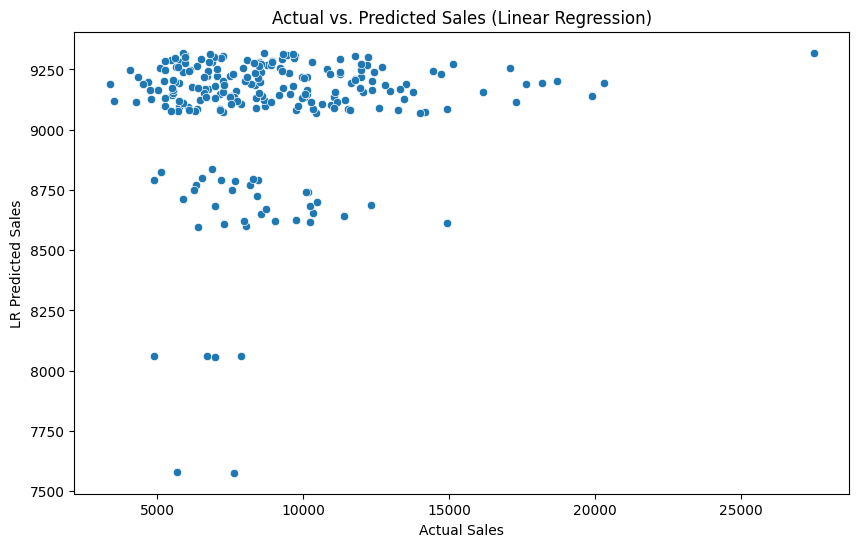

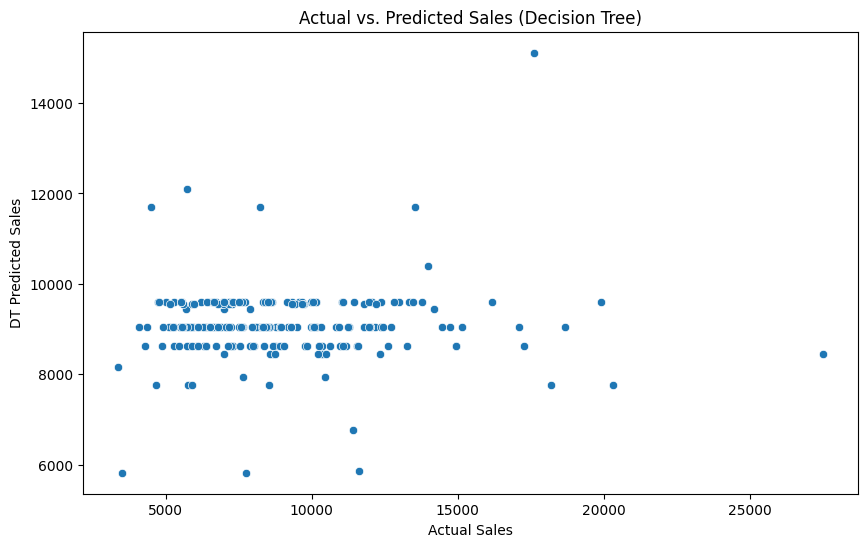

In [136]:
y_pred_lr_flat = y_pred_lr.flatten()
y_pred_dt_flat = y_pred_dt.flatten()

# Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr_flat)
plt.xlabel('Actual Sales')
plt.ylabel('LR Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.show()

# Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt_flat)
plt.xlabel('Actual Sales')
plt.ylabel('DT Predicted Sales')
plt.title('Actual vs. Predicted Sales (Decision Tree)')
plt.show()

A good prediction should show the points aligned on the diagolal y_test = y_pred_*. These diagrams clearly show that the predictions are pretty bad, scattered all over the plane.

Q15. Plot the residuals (actual - predicted) for Linear Regression. Do they appear
normally distributed?

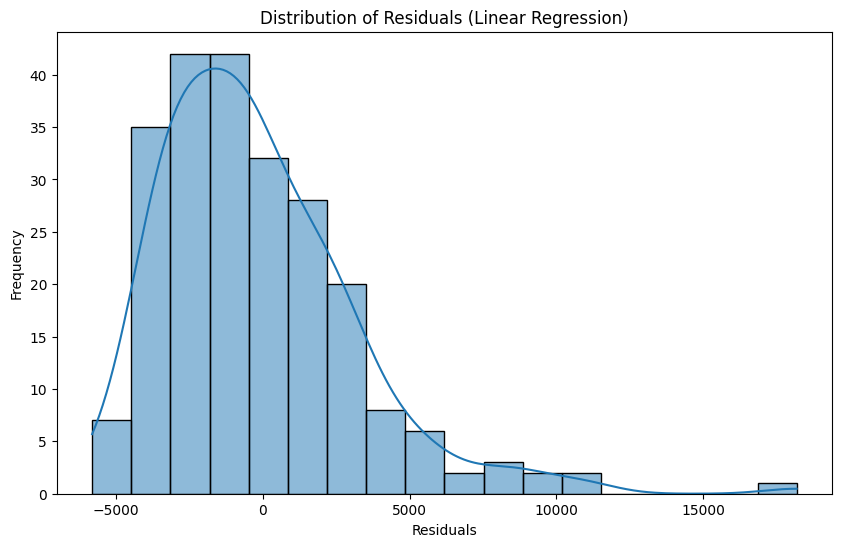

In [137]:
# residuals for Linear Regression
residuals_lr = y_test - y_pred_lr_flat

# histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()



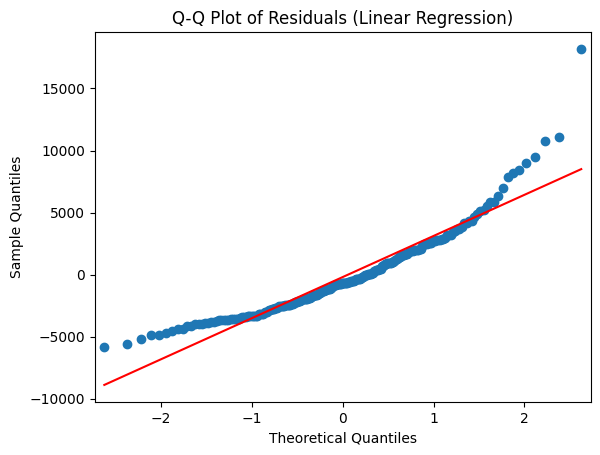

In [138]:
# Q-Q plot of residuals to check for normality
import statsmodels.api as sm
sm.qqplot(residuals_lr, line='s')
plt.title('Q-Q Plot of Residuals (Linear Regression)')
plt.show()

The residuals are not normally distributed. data are positively skewed.  

Q16. Which model generalizes better? Which is more interpretable?

In [139]:
# analysis
print('\n\nAnalysis:')
if r2_lr > r2_dt:
    print('Linear Regression performs better based on R-squared.')
elif r2_dt > r2_lr:
    print('Decision Tree performs better based on R-squared.')
else:
    print('Both models have the same R-squared score.')

if mse_lr < mse_dt:
    print('Linear Regression performs better based on MSE.')
elif mse_dt < mse_lr:
    print('Decision Tree  performs better based on MSE.')
else:
    print('Both models have the same MSE.')



Analysis:
Linear Regression performs better based on R-squared.
Linear Regression performs better based on MSE.


Linear regression generalizes better on little features like in the given dataset. Decison Tree tends to overfit on little features.

Linear regression is more interpretable as model since it associated a coefficent for each feature, while the Decision tree provide a global structure which increase in complexity with the number of nodes


Q17. What business insights can you draw from this analysis?

There are no business insights since both models perform very poorly, as shown by the very low R-squared and the very high MSE.
  The same indicate that the driving coefficient are missing in the equations. This is probably due to the choice of the features.

Q18. What limitations exist in this modeling approach?

1. The choice of the features is limited and posiible not capturing the business drivers

2. data is limited e.g. 2 days (4 and 5)

3. the residuals are not normally distributed. This violates the pre-requisites of the Linear Regression (OLS). Other models should be used isntead e.g. WLS or generalized models.

4. limited depth of the decision tree



Q19. How could you improve the model further? (e.g., more features, time series
models, etc.)

1. adding all features to the model

2. analyze the outliers and treat them, like capping them to get them normalized

3. use alternative Linear regression models e.g. WLS or GLS.

4. increase the depth of the decision tree or better opt for random forests regressor

5. use time series. Sales have typical temporal pattern. Time series algorithms like ARIMA or SARIMA can probably provide better results.